In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("D:\Ragavi\Time Series -Data Analytics\PJMW_hourly.csv")
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  143206 non-null  object 
 1   PJMW_MW   143206 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [10]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [11]:
#Convert object to datetime
#df['Datetime']=pd.to_datetime(df['Datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143206 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJMW_MW  143206 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


# Analysis

<Axes: xlabel='Datetime'>

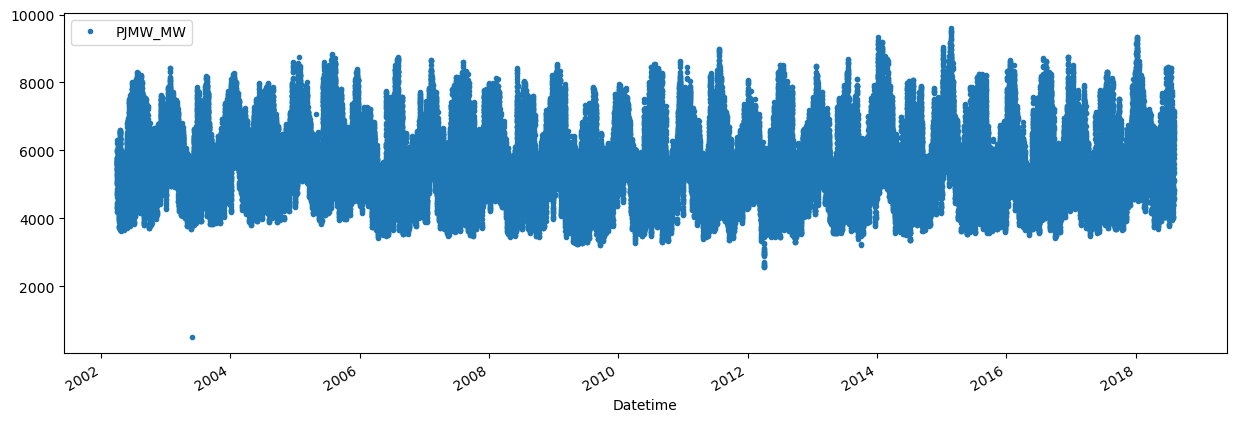

In [13]:

color_pal = sns.color_palette()
df.plot(style='.',figsize=(15, 5),
        color=color_pal[0])

# Creation of Features

In [14]:
def feature_creation(df):
    df['hour']=df.index.hour
    df['dayofweek']=df.index.dayofweek
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    return df

In [15]:
df=feature_creation(df)
df.head()

,PJMW_MW,hour,dayofweek,month,year,dayofyear
Datetime,,,,,,
2002-12-31 01:00:00,5077.0,1,1,12,2002,365
2002-12-31 02:00:00,4939.0,2,1,12,2002,365
2002-12-31 03:00:00,4885.0,3,1,12,2002,365
2002-12-31 04:00:00,4857.0,4,1,12,2002,365
2002-12-31 05:00:00,4930.0,5,1,12,2002,365


Text(0.5, 1.0, 'Hourly Calculation')

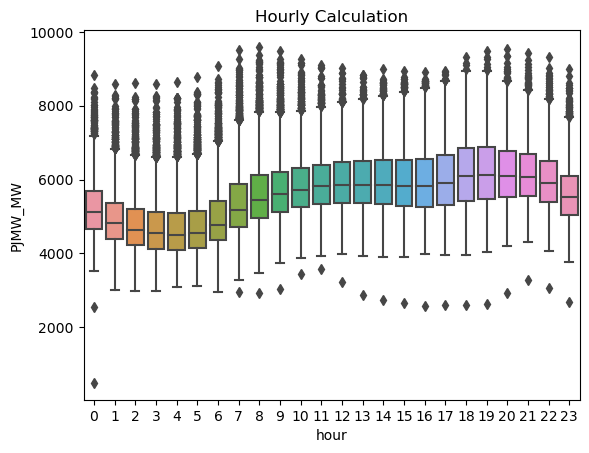

In [18]:
sns.boxplot(data=df,x='hour',y='PJMW_MW')
plt.title('Hourly Consumption')

Text(0.5, 1.0, 'Monthly Consumption')

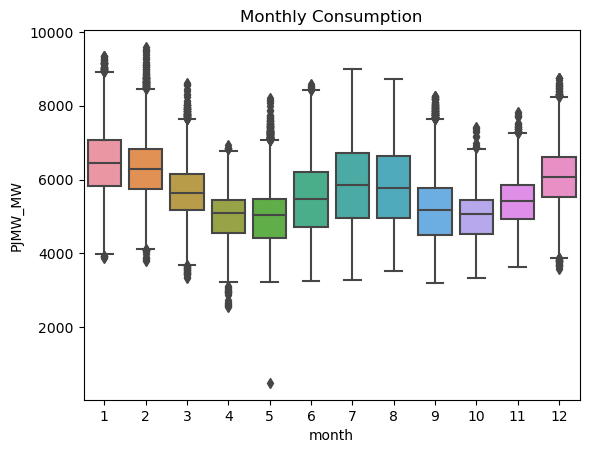

In [19]:
sns.boxplot(data=df,x='month',y='PJMW_MW')
plt.title('Monthly Consumption')

Text(0.5, 1.0, 'Yearly Consumption')

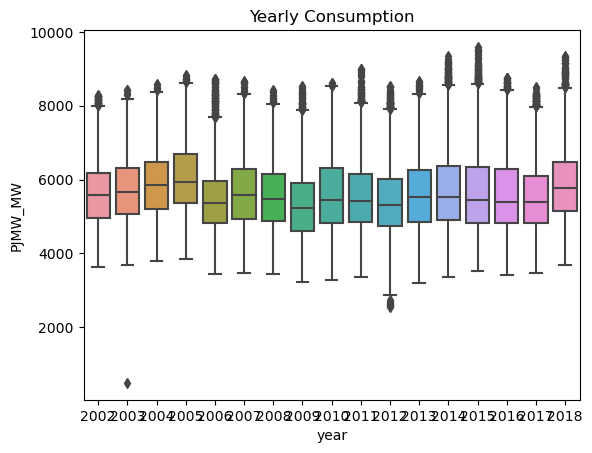

In [20]:
sns.boxplot(data=df,x='year',y='PJMW_MW')
plt.title('Yearly Consumption')

# Train Test Split

In [25]:
df.shape

(143206, 6)

In [26]:
train=df.loc[df.index<'01-01-2015']
test=df.loc[df.index>='01-01-2015']

In [27]:
train.shape

(111766, 6)

In [28]:
test.shape

(31440, 6)

D:\Ragavi\Python\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


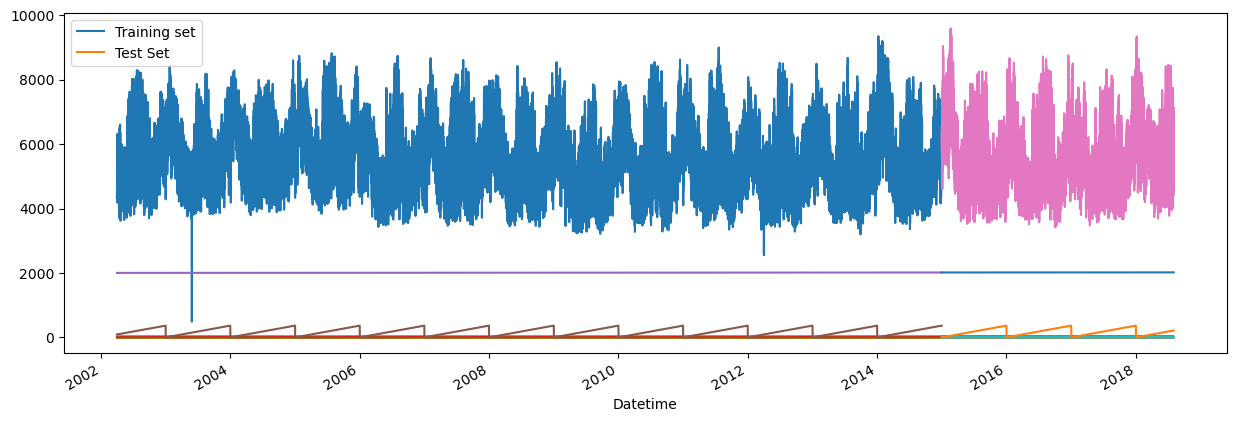

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax,label='Training set')
test.plot(ax=ax,label='Test Set')
ax.legend(['Training set','Test Set'])
plt.show()

In [34]:
X_train=train.drop(['PJMW_MW'],axis=1)
y_train=train['PJMW_MW']
X_test=test.drop(['PJMW_MW'],axis=1)
y_test=test['PJMW_MW']

In [39]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 1.0/99.8 MB 20.7 MB/s eta 0:00:05
    --------------------------------------- 1.5/99.8 MB 23.8 MB/s eta 0:00:05
    --------------------------------------- 1.5/99.8 MB 23.8 MB/s eta 0:00:05
    --------------------------------------- 1.5/99.8 MB 23.8 MB/s eta 0:00:05
    --------------------------------------- 1.5/99.8 MB 23.8 MB/s eta 0:00:05
    --------------------------------------- 1.5/99.8 MB 23.8 MB/s eta 0:00:05
    --------------------------------------- 1.7/99.8 MB 5.2 MB/s eta 0:00:19
   - -------------------------------------- 2.7/99.8 MB 6.8 MB/s eta 0:00:15
   - -------------------------------------- 3.2/99.8 MB 7.7 MB/s eta 0:00:13
   - ---------------------

In [40]:
import xgboost as xgb
reg=xgb.XGBRegressor(n_estimator=1000)
reg.fit(X_train,y_train)
f=pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_,columns=['importance'])
f

D:\Ragavi\Python\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


,importance
hour,0.449542
dayofweek,0.113845
month,0.188262
year,0.066353
dayofyear,0.181997


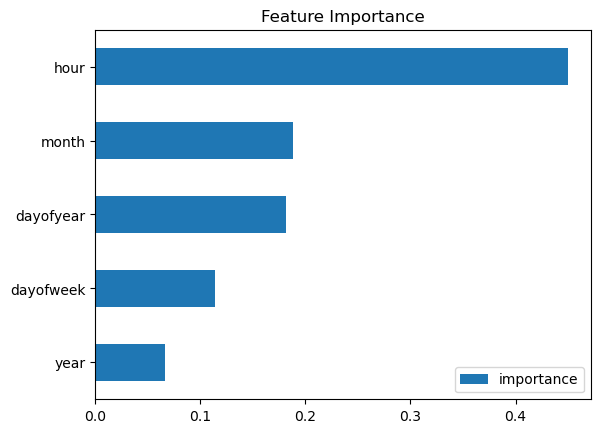

In [42]:
f.sort_values('importance').plot(kind='barh',title='Feature Importance')
plt.show()

In [43]:
y_pred=reg.predict(X_test)
y_pred

array([5819.1055, 5581.959 , 5472.8315, ..., 7135.3506, 6904.6577,
       6399.31  ], dtype=float32)

In [44]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse


529230.6131522434

In [45]:
rmse=np.sqrt(mse)
rmse

727.4823799599847